In [1]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

# Gather data and Data Cleaning

In [3]:
rotten_tomatoes_df = pd.read_csv("../Resources/rotten_tomatoes_movies.csv")

In [4]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [5]:
rotten_tomatoes_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning Thief,"Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld.","Though it may seem like just another Harry Potter knockoff, Percy Jackson benefits from a strong supporting cast, a speedy plot, and plenty of fun with Greek mythology.",PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake Abel, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Melina Kanakaredes, Catherine Keener, Kevin Mckidd, Joe Pantoliano, Uma Thurman, Ray Winstone, Julian Richings, Bonita Friedericy, Annie Ilonzeh, Tania Saulnier, Marie Avgeropoulos, Luisa D'Oliveira, Christie Laing, Marielle Jaffe, Elisa King, Chrystal Tisiga, Alexis Knapp, Charlie Gallant, Chelan Simmons, Andrea Brooks, Natassia Malthe, Max Van Ville, Serinda Swan, Dimitri Lekkos, Ona Grauer, Stefanie von Pfetten, Conrad Coates, Erica Cerra, Dylan Neal, Luke Camilleri, Holly Hougham, Ina Geraldine, Raquel Riskin, Yusleidis Oquendo, Janine Edwards, Valerie Tian, Violet Columbus, Sarah Smyth, Merritt Patterson, Julie Luck, Andrea Day, John Stewart, Suzanne Ristic, Deejay Jackson, Matthew Garrick, Stan Carp, Suzanna Ristic, Richard Harmon, Maria Olsen, Robin Lemon, Doyle Devereux, Tom Pickett, VJ Delos-Reyes, Tim Aas, Keith Dallas, Spencer Atkinson, Maya Washington, Loyd Bateman, Victor Ayala, Zane Holtz, Eli Zagoudakis, Matt Reimer, Rob Hayter, Lloyd Bateman, Shawn Beaton, Jarod Joseph, Reilly Dolman, Paul Cummings, Julie Brar, Dejan Loyola, Damian Arman, Mario Casoria, Dorla Bell, Carolyn Adair (II), Jade Pawluk, G. Patrick Currie, Darian Arman, Mariela Zapata, David L. Smith",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,"Kate (Catherine Keener) and her husband Alex (Oliver Platt) are wealthy New Yorkers who prowl estate sales and make a tidy profit reselling items they bought cheaply. They buy the apartment next door and plan to remodel just as soon as its current occupant, a cranky old woman, dies. Kate is troubled by the way she and her husband earn a living, and tries to assuage her guilt by befriending her tenant and the woman's granddaughters, but her overtures lead to unexpected consequences.","Nicole Holofcener's newest might seem slight in places, but its rendering of complex characters in a conflicted economic landscape is varied, natural, and touching all the same.",R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, Rebecca Hall, Sarah Steele, Ann Morgan Guilbert, Kevin Corrigan, Lois Smith",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter falls hopelessly in love with the woman of his dreams, and even follows the girl and her new husband to their Mexican honeymoon resort. While his behavior seems sure to land him in trouble, out of the blue fate plays into his hands.","Blake Edwards' bawdy comedy may not score a perfect 10, but Dudley Moore's self-deprecating performance makes this midlife crisi

In [6]:
rotten_tomatoes_df.production_company.value_counts()

Paramount Pictures                                    517
Warner Bros. Pictures                                 509
Universal Pictures                                    495
20th Century Fox                                      423
IFC Films                                             413
Sony Pictures Home Entertainment                      388
Warner Home Video                                     369
Netflix                                               357
MGM                                                   279
Sony Pictures Classics                                262
Magnolia Pictures                                     257
MGM Home Entertainment                                252
Columbia Pictures                                     237
WARNER BROTHERS PICTURES                              188
Sony Pictures                                         185
United Artists                                        168
Miramax                                               165
MCA Universal 

In [7]:
df = rotten_tomatoes_df.copy()

In [8]:
df = df.loc[:,["movie_title", "movie_info", "content_rating", "genres", "directors", "authors", "actors", "original_release_date", "runtime", "production_company","tomatometer_rating","audience_rating"]]
df = df.dropna().reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14639 entries, 0 to 14638
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_title            14639 non-null  object 
 1   movie_info             14639 non-null  object 
 2   content_rating         14639 non-null  object 
 3   genres                 14639 non-null  object 
 4   directors              14639 non-null  object 
 5   authors                14639 non-null  object 
 6   actors                 14639 non-null  object 
 7   original_release_date  14639 non-null  object 
 8   runtime                14639 non-null  float64
 9   production_company     14639 non-null  object 
 10  tomatometer_rating     14639 non-null  float64
 11  audience_rating        14639 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.3+ MB


In [9]:
df.head()

,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_rating,audience_rating
0,Percy Jackson & the Olympians: The Lightning Thief,"Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld.",PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake Abel, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Melina Kanakaredes, Catherine Keener, Kevin Mckidd, Joe Pantoliano, Uma Thurman, Ray Winstone, Julian Richings, Bonita Friedericy, Annie Ilonzeh, Tania Saulnier, Marie Avgeropoulos, Luisa D'Oliveira, Christie Laing, Marielle Jaffe, Elisa King, Chrystal Tisiga, Alexis Knapp, Charlie Gallant, Chelan Simmons, Andrea Brooks, Natassia Malthe, Max Van Ville, Serinda Swan, Dimitri Lekkos, Ona Grauer, Stefanie von Pfetten, Conrad Coates, Erica Cerra, Dylan Neal, Luke Camilleri, Holly Hougham, Ina Geraldine, Raquel Riskin, Yusleidis Oquendo, Janine Edwards, Valerie Tian, Violet Columbus, Sarah Smyth, Merritt Patterson, Julie Luck, Andrea Day, John Stewart, Suzanne Ristic, Deejay Jackson, Matthew Garrick, Stan Carp, Suzanna Ristic, Richard Harmon, Maria Olsen, Robin Lemon, Doyle Devereux, Tom Pickett, VJ Delos-Reyes, Tim Aas, Keith Dallas, Spencer Atkinson, Maya Washington, Loyd Bateman, Victor Ayala, Zane Holtz, Eli Zagoudakis, Matt Reimer, Rob Hayter, Lloyd Bateman, Shawn Beaton, Jarod Joseph, Reilly Dolman, Paul Cummings, Julie Brar, Dejan Loyola, Damian Arman, Mario Casoria, Dorla Bell, Carolyn Adair (II), Jade Pawluk, G. Patrick Currie, Darian Arman, Mariela Zapata, David L. Smith",2010-02-12,119.0,20th Century Fox,49.0,53.0
1,Please Give,"Kate (Catherine Keener) and her husband Alex (Oliver Platt) are wealthy New Yorkers who prowl estate sales and make a tidy profit reselling items they bought cheaply. They buy the apartment next door and plan to remodel just as soon as its current occupant, a cranky old woman, dies. Kate is troubled by the way she and her husband earn a living, and tries to assuage her guilt by befriending her tenant and the woman's granddaughters, but her overtures lead to unexpected consequences.",R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, Rebecca Hall, Sarah Steele, Ann Morgan Guilbert, Kevin Corrigan, Lois Smith",2010-04-30,90.0,Sony Pictures Classics,87.0,64.0
2,10,"A successful, middle-aged Hollywood songwriter falls hopelessly in love with the woman of his dreams, and even follows the girl and her new husband to their Mexican honeymoon resort. While his behavior seems sure to land him in trouble, out of the blue fate plays into his hands.",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert Webber, Dee Wallace, Sam Jones III, Sam J. Jones, Brian Dennehy, Max Showalter, Rad Daly, Nedra Volz, James Noble, Virginia Kiser, John Hawker, Deborah Rush, Don Calfa, Walter George Alton, Annette Martin, John Hancock, Lorry Goldman, Arthur Rosenberg, Mari Gorman, Marcy Hanson, Julia Jennings, Senilo Tanney, Kitty DeCarlo, William Lucking, Owen Sullivan, Debbie White, Laurence Carr, Camila Ashland, Adrian Aron, Gail Bowman, Burke Byrnes, Michael Champion, Doug Sheehan, J. Victor Lopez, Gregory Chase, Jon Linton, Ellen Clark, Antonia Ellis, John Chappell, Lynn Farrell, Art Kassul, Denise Crosby, Jeanetta Arnette",1979-10-05,122.0,Waner Bros.,67.0,53.0
3,12 Angry Men (Twelve Angry Men),"Following the closing arguments in a murder trial

In [10]:
df["original_release_date"]=pd.to_datetime(df.original_release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14639 entries, 0 to 14638
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   movie_title            14639 non-null  object        
 1   movie_info             14639 non-null  object        
 2   content_rating         14639 non-null  object        
 3   genres                 14639 non-null  object        
 4   directors              14639 non-null  object        
 5   authors                14639 non-null  object        
 6   actors                 14639 non-null  object        
 7   original_release_date  14639 non-null  datetime64[ns]
 8   runtime                14639 non-null  float64       
 9   production_company     14639 non-null  object        
 10  tomatometer_rating     14639 non-null  float64       
 11  audience_rating        14639 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 1.

In [11]:
df["year"]=df.original_release_date.apply(lambda x: x.year)

In [12]:
df["month"]=df.original_release_date.apply(lambda x: x.month)

In [13]:
df.head()

,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_rating,audience_rating,year,month
0,Percy Jackson & the Olympians: The Lightning Thief,"Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld.",PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake Abel, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Melina Kanakaredes, Catherine Keener, Kevin Mckidd, Joe Pantoliano, Uma Thurman, Ray Winstone, Julian Richings, Bonita Friedericy, Annie Ilonzeh, Tania Saulnier, Marie Avgeropoulos, Luisa D'Oliveira, Christie Laing, Marielle Jaffe, Elisa King, Chrystal Tisiga, Alexis Knapp, Charlie Gallant, Chelan Simmons, Andrea Brooks, Natassia Malthe, Max Van Ville, Serinda Swan, Dimitri Lekkos, Ona Grauer, Stefanie von Pfetten, Conrad Coates, Erica Cerra, Dylan Neal, Luke Camilleri, Holly Hougham, Ina Geraldine, Raquel Riskin, Yusleidis Oquendo, Janine Edwards, Valerie Tian, Violet Columbus, Sarah Smyth, Merritt Patterson, Julie Luck, Andrea Day, John Stewart, Suzanne Ristic, Deejay Jackson, Matthew Garrick, Stan Carp, Suzanna Ristic, Richard Harmon, Maria Olsen, Robin Lemon, Doyle Devereux, Tom Pickett, VJ Delos-Reyes, Tim Aas, Keith Dallas, Spencer Atkinson, Maya Washington, Loyd Bateman, Victor Ayala, Zane Holtz, Eli Zagoudakis, Matt Reimer, Rob Hayter, Lloyd Bateman, Shawn Beaton, Jarod Joseph, Reilly Dolman, Paul Cummings, Julie Brar, Dejan Loyola, Damian Arman, Mario Casoria, Dorla Bell, Carolyn Adair (II), Jade Pawluk, G. Patrick Currie, Darian Arman, Mariela Zapata, David L. Smith",2010-02-12,119.0,20th Century Fox,49.0,53.0,2010,2
1,Please Give,"Kate (Catherine Keener) and her husband Alex (Oliver Platt) are wealthy New Yorkers who prowl estate sales and make a tidy profit reselling items they bought cheaply. They buy the apartment next door and plan to remodel just as soon as its current occupant, a cranky old woman, dies. Kate is troubled by the way she and her husband earn a living, and tries to assuage her guilt by befriending her tenant and the woman's granddaughters, but her overtures lead to unexpected consequences.",R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, Rebecca Hall, Sarah Steele, Ann Morgan Guilbert, Kevin Corrigan, Lois Smith",2010-04-30,90.0,Sony Pictures Classics,87.0,64.0,2010,4
2,10,"A successful, middle-aged Hollywood songwriter falls hopelessly in love with the woman of his dreams, and even follows the girl and her new husband to their Mexican honeymoon resort. While his behavior seems sure to land him in trouble, out of the blue fate plays into his hands.",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert Webber, Dee Wallace, Sam Jones III, Sam J. Jones, Brian Dennehy, Max Showalter, Rad Daly, Nedra Volz, James Noble, Virginia Kiser, John Hawker, Deborah Rush, Don Calfa, Walter George Alton, Annette Martin, John Hancock, Lorry Goldman, Arthur Rosenberg, Mari Gorman, Marcy Hanson, Julia Jennings, Senilo Tanney, Kitty DeCarlo, William Lucking, Owen Sullivan, Debbie White, Laurence Carr, Camila Ashland, Adrian Aron, Gail Bowman, Burke Byrnes, Michael Champion, Doug Sheehan, J. Victor Lopez, Gregory Chase, Jon Linton, Ellen Clark, Antonia Ellis, John Chappell, Lynn Farrell, Art Kassul, Denise Crosby, Jeanetta Arnette",1979-10-05,122.0,Waner Bros.,67.0,53.0,1979,10
3,12 Angry Men (Twelve Angry Men),"Following the cl

In [14]:
df["len_title"]=df.movie_title.apply(lambda x: len(x))

In [15]:
df["len_movie_info"]=df.movie_info.apply(lambda x: len(x))

In [16]:
df.head()


,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_rating,audience_rating,year,month,len_title,len_movie_info
0,Percy Jackson & the Olympians: The Lightning Thief,"Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld.",PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake Abel, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Melina Kanakaredes, Catherine Keener, Kevin Mckidd, Joe Pantoliano, Uma Thurman, Ray Winstone, Julian Richings, Bonita Friedericy, Annie Ilonzeh, Tania Saulnier, Marie Avgeropoulos, Luisa D'Oliveira, Christie Laing, Marielle Jaffe, Elisa King, Chrystal Tisiga, Alexis Knapp, Charlie Gallant, Chelan Simmons, Andrea Brooks, Natassia Malthe, Max Van Ville, Serinda Swan, Dimitri Lekkos, Ona Grauer, Stefanie von Pfetten, Conrad Coates, Erica Cerra, Dylan Neal, Luke Camilleri, Holly Hougham, Ina Geraldine, Raquel Riskin, Yusleidis Oquendo, Janine Edwards, Valerie Tian, Violet Columbus, Sarah Smyth, Merritt Patterson, Julie Luck, Andrea Day, John Stewart, Suzanne Ristic, Deejay Jackson, Matthew Garrick, Stan Carp, Suzanna Ristic, Richard Harmon, Maria Olsen, Robin Lemon, Doyle Devereux, Tom Pickett, VJ Delos-Reyes, Tim Aas, Keith Dallas, Spencer Atkinson, Maya Washington, Loyd Bateman, Victor Ayala, Zane Holtz, Eli Zagoudakis, Matt Reimer, Rob Hayter, Lloyd Bateman, Shawn Beaton, Jarod Joseph, Reilly Dolman, Paul Cummings, Julie Brar, Dejan Loyola, Damian Arman, Mario Casoria, Dorla Bell, Carolyn Adair (II), Jade Pawluk, G. Patrick Currie, Darian Arman, Mariela Zapata, David L. Smith",2010-02-12,119.0,20th Century Fox,49.0,53.0,2010,2,50,454
1,Please Give,"Kate (Catherine Keener) and her husband Alex (Oliver Platt) are wealthy New Yorkers who prowl estate sales and make a tidy profit reselling items they bought cheaply. They buy the apartment next door and plan to remodel just as soon as its current occupant, a cranky old woman, dies. Kate is troubled by the way she and her husband earn a living, and tries to assuage her guilt by befriending her tenant and the woman's granddaughters, but her overtures lead to unexpected consequences.",R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, Rebecca Hall, Sarah Steele, Ann Morgan Guilbert, Kevin Corrigan, Lois Smith",2010-04-30,90.0,Sony Pictures Classics,87.0,64.0,2010,4,11,486
2,10,"A successful, middle-aged Hollywood songwriter falls hopelessly in love with the woman of his dreams, and even follows the girl and her new husband to their Mexican honeymoon resort. While his behavior seems sure to land him in trouble, out of the blue fate plays into his hands.",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert Webber, Dee Wallace, Sam Jones III, Sam J. Jones, Brian Dennehy, Max Showalter, Rad Daly, Nedra Volz, James Noble, Virginia Kiser, John Hawker, Deborah Rush, Don Calfa, Walter George Alton, Annette Martin, John Hancock, Lorry Goldman, Arthur Rosenberg, Mari Gorman, Marcy Hanson, Julia Jennings, Senilo Tanney, Kitty DeCarlo, William Lucking, Owen Sullivan, Debbie White, Laurence Carr, Camila Ashland, Adrian Aron, Gail Bowman, Burke Byrnes, Michael Champion, Doug Sheehan, J. Victor Lopez, Gregory Chase, Jon Linton, Ellen Clark, Antonia Ellis, John Chappell, Lynn Farrell, Art Kassul, Denise Crosby, Jeanetta Arnette",1979-10-05,122.0,Waner Bros.,67.0,53.0,1979,10,2,279
3,12 A

In [17]:
def getnum_ppl(x):
    rtn = 0
    if len(x)>0:
        if "," in x:
            rtn = len(x.split(","))
        else:
            rtn = 1
    else:
        rtn = 0
    
    return(rtn) 

        
            
    

In [18]:
df["num_directors"]=df.directors.apply(lambda x: getnum_ppl(x))

In [19]:
df["num_authors"]=df.authors.apply(lambda x: getnum_ppl(x))

In [20]:
df["num_actors"]=df.actors.apply(lambda x: getnum_ppl(x))

In [21]:
df["num_genres"]=df.genres.apply(lambda x: getnum_ppl(x))

In [22]:
df.head()

,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_rating,audience_rating,year,month,len_title,len_movie_info,num_directors,num_authors,num_actors,num_genres
0,Percy Jackson & the Olympians: The Lightning Thief,"Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld.",PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake Abel, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Melina Kanakaredes, Catherine Keener, Kevin Mckidd, Joe Pantoliano, Uma Thurman, Ray Winstone, Julian Richings, Bonita Friedericy, Annie Ilonzeh, Tania Saulnier, Marie Avgeropoulos, Luisa D'Oliveira, Christie Laing, Marielle Jaffe, Elisa King, Chrystal Tisiga, Alexis Knapp, Charlie Gallant, Chelan Simmons, Andrea Brooks, Natassia Malthe, Max Van Ville, Serinda Swan, Dimitri Lekkos, Ona Grauer, Stefanie von Pfetten, Conrad Coates, Erica Cerra, Dylan Neal, Luke Camilleri, Holly Hougham, Ina Geraldine, Raquel Riskin, Yusleidis Oquendo, Janine Edwards, Valerie Tian, Violet Columbus, Sarah Smyth, Merritt Patterson, Julie Luck, Andrea Day, John Stewart, Suzanne Ristic, Deejay Jackson, Matthew Garrick, Stan Carp, Suzanna Ristic, Richard Harmon, Maria Olsen, Robin Lemon, Doyle Devereux, Tom Pickett, VJ Delos-Reyes, Tim Aas, Keith Dallas, Spencer Atkinson, Maya Washington, Loyd Bateman, Victor Ayala, Zane Holtz, Eli Zagoudakis, Matt Reimer, Rob Hayter, Lloyd Bateman, Shawn Beaton, Jarod Joseph, Reilly Dolman, Paul Cummings, Julie Brar, Dejan Loyola, Damian Arman, Mario Casoria, Dorla Bell, Carolyn Adair (II), Jade Pawluk, G. Patrick Currie, Darian Arman, Mariela Zapata, David L. Smith",2010-02-12,119.0,20th Century Fox,49.0,53.0,2010,2,50,454,1,3,87,4
1,Please Give,"Kate (Catherine Keener) and her husband Alex (Oliver Platt) are wealthy New Yorkers who prowl estate sales and make a tidy profit reselling items they bought cheaply. They buy the apartment next door and plan to remodel just as soon as its current occupant, a cranky old woman, dies. Kate is troubled by the way she and her husband earn a living, and tries to assuage her guilt by befriending her tenant and the woman's granddaughters, but her overtures lead to unexpected consequences.",R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, Rebecca Hall, Sarah Steele, Ann Morgan Guilbert, Kevin Corrigan, Lois Smith",2010-04-30,90.0,Sony Pictures Classics,87.0,64.0,2010,4,11,486,1,1,8,1
2,10,"A successful, middle-aged Hollywood songwriter falls hopelessly in love with the woman of his dreams, and even follows the girl and her new husband to their Mexican honeymoon resort. While his behavior seems sure to land him in trouble, out of the blue fate plays into his hands.",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert Webber, Dee Wallace, Sam Jones III, Sam J. Jones, Brian Dennehy, Max Showalter, Rad Daly, Nedra Volz, James Noble, Virginia Kiser, John Hawker, Deborah Rush, Don Calfa, Walter George Alton, Annette Martin, John Hancock, Lorry Goldman, Arthur Rosenberg, Mari Gorman, Marcy Hanson, Julia Jennings, Senilo Tanney, Kitty DeCarlo, William Lucking, Owen Sullivan, Debbie White, Laurence Carr, Camila Ashland, Adrian Aron, Gail Bowman, Burke Byrnes, Michael Champion, Doug Sheehan, J. Victor Lopez, Gregory Chase, Jon Linton, Ellen Clark, Antonia Ellis, John Chappell, Lynn Farrell, Art Kassul, Denise Crosby, Jeanetta Arn

In [23]:
def getfirst_genre(x):
    rtn = ""
    if len(x)>0:
        if "," in x:
            rtn = x.split(",")[0]
        else:
            rtn = x
    else:
        rtn = ""
    
    return(rtn) 

        
            

In [24]:
df["main_genre"]=df.genres.apply(lambda x: getfirst_genre(x))

In [25]:
df.columns

Index(['movie_title', 'movie_info', 'content_rating', 'genres', 'directors',
       'authors', 'actors', 'original_release_date', 'runtime',
       'production_company', 'tomatometer_rating', 'audience_rating', 'year',
       'month', 'len_title', 'len_movie_info', 'num_directors', 'num_authors',
       'num_actors', 'num_genres', 'main_genre'],
      dtype='object')

In [26]:
df_prod = df.loc[:,['content_rating','runtime','production_company',
        'tomatometer_rating', 'audience_rating', 'year',
       'month', 'len_title', 'len_movie_info', 'num_directors', 'num_authors',
       'num_actors', 'num_genres', 'main_genre']]
df_prod.head()

,content_rating,runtime,production_company,tomatometer_rating,audience_rating,year,month,len_title,len_movie_info,num_directors,num_authors,num_actors,num_genres,main_genre
0,PG,119.0,20th Century Fox,49.0,53.0,2010,2,50,454,1,3,87,4,Action & Adventure
1,R,90.0,Sony Pictures Classics,87.0,64.0,2010,4,11,486,1,1,8,1,Comedy
2,R,122.0,Waner Bros.,67.0,53.0,1979,10,2,279,1,1,46,2,Comedy
3,NR,95.0,Criterion Collection,100.0,97.0,1957,4,31,450,1,1,16,2,Classics
4,G,127.0,Disney,89.0,74.0,1954,1,28,489,1,1,16,3,Action & Adventure


In [27]:

df_prod.to_csv("../Resources/cleaned_rotten_tomatoes.csv",index=False)
cleaned_rotten_tomatoes = pd.read_csv("../Resources/cleaned_rotten_tomatoes.csv")
cleaned_rotten_tomatoes.head() 

,content_rating,runtime,production_company,tomatometer_rating,audience_rating,year,month,len_title,len_movie_info,num_directors,num_authors,num_actors,num_genres,main_genre
0,PG,119.0,20th Century Fox,49.0,53.0,2010,2,50,454,1,3,87,4,Action & Adventure
1,R,90.0,Sony Pictures Classics,87.0,64.0,2010,4,11,486,1,1,8,1,Comedy
2,R,122.0,Waner Bros.,67.0,53.0,1979,10,2,279,1,1,46,2,Comedy
3,NR,95.0,Criterion Collection,100.0,97.0,1957,4,31,450,1,1,16,2,Classics
4,G,127.0,Disney,89.0,74.0,1954,1,28,489,1,1,16,3,Action & Adventure


In [28]:
df_prod_cmp = pd.read_csv("../Resources/cleaned_rotten_tomatoes_with_prod.csv")
df_prod_cmp.head()

,tempID#,content_rating,runtime,production_company,tomatometer_rating,audience_rating,year,month,len_title,len_movie_info,num_directors,num_authors,num_actors,num_genres,main_genre
0,1,PG,119,20th Century Fox,49,53,2010,2,50,454,1,3,87,4,Action & Adventure
1,2,R,90,Sony,87,64,2010,4,11,486,1,1,8,1,Comedy
2,3,R,122,Warner Bros.,67,53,1979,10,2,279,1,1,46,2,Comedy
3,4,NR,95,Other,100,97,1957,4,31,450,1,1,16,2,Classics
4,5,G,127,Disney,89,74,1954,1,28,489,1,1,16,3,Action & Adventure


In [29]:
production_cmp_count = df_prod_cmp.production_company.value_counts()
production_cmp_count

Other               6858
Warner Bros.        1156
Sony                 969
20th Century Fox     853
Paramount            749
Universal            745
MGM                  572
IFC                  455
Lionsgate            412
Columbia             254
Magnolia             232
Disney               231
Buena Vista          221
New Line             190
United Artists       173
Focus                144
Samuel Goldwyn       128
Netflix              104
Kino                 100
DreamWorks            93
Name: production_company, dtype: int64

<AxesSubplot:ylabel='Density'>

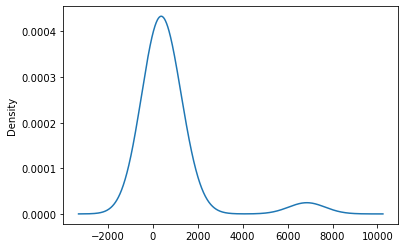

In [30]:
# Visualize the value counts of APPLICATION_TYPE
production_cmp_count.plot.density()

In [31]:
# Determine which values to replace if counts are less than ...?
replace_production = list(production_cmp_count[production_cmp_count<230].index)

# Replace in dataframe
for app in replace_production:
    df_prod_cmp.production_company = df_prod_cmp.production_company.replace(app,"Other")
    
# Check to make sure binning was successful
df_prod_cmp.production_company.value_counts()

Other               8011
Warner Bros.        1156
Sony                 969
20th Century Fox     853
Paramount            749
Universal            745
MGM                  572
IFC                  455
Lionsgate            412
Columbia             254
Magnolia             232
Disney               231
Name: production_company, dtype: int64

In [32]:
df_prod_cmp.columns

Index(['tempID#', 'content_rating', 'runtime', 'production_company',
       'tomatometer_rating', 'audience_rating', 'year', 'month', 'len_title',
       'len_movie_info', 'num_directors', 'num_authors', 'num_actors',
       'num_genres', 'main_genre'],
      dtype='object')

In [33]:
df_prod_cmp.head()

,tempID#,content_rating,runtime,production_company,tomatometer_rating,audience_rating,year,month,len_title,len_movie_info,num_directors,num_authors,num_actors,num_genres,main_genre
0,1,PG,119,20th Century Fox,49,53,2010,2,50,454,1,3,87,4,Action & Adventure
1,2,R,90,Sony,87,64,2010,4,11,486,1,1,8,1,Comedy
2,3,R,122,Warner Bros.,67,53,1979,10,2,279,1,1,46,2,Comedy
3,4,NR,95,Other,100,97,1957,4,31,450,1,1,16,2,Classics
4,5,G,127,Disney,89,74,1954,1,28,489,1,1,16,3,Action & Adventure


In [34]:
df_sub = df_prod_cmp.loc[:,['runtime','production_company',
        'tomatometer_rating', 'audience_rating',
       'month', 'len_title', 'len_movie_info', 'num_directors', 'num_authors',
       'num_actors', 'num_genres', 'main_genre']]

df_sub = pd.get_dummies(df_sub)
df_sub.head()

,runtime,tomatometer_rating,audience_rating,month,len_title,len_movie_info,num_directors,num_authors,num_actors,num_genres,production_company_20th Century Fox,production_company_Columbia,production_company_Disney,production_company_IFC,production_company_Lionsgate,production_company_MGM,production_company_Magnolia,production_company_Other,production_company_Paramount,production_company_Sony,production_company_Universal,production_company_Warner Bros.,main_genre_Action & Adventure,main_genre_Animation,main_genre_Art House & International,main_genre_Classics,main_genre_Comedy,main_genre_Cult Movies,main_genre_Documentary,main_genre_Drama,main_genre_Horror,main_genre_Kids & Family,main_genre_Musical & Performing Arts,main_genre_Mystery & Suspense,main_genre_Romance,main_genre_Science Fiction & Fantasy,main_genre_Western
0,119,49,53,2,50,454,1,3,87,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,87,64,4,11,486,1,1,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,122,67,53,10,2,279,1,1,46,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,95,100,97,4,31,450,1,1,16,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,127,89,74,1,28,489,1,1,16,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14639 entries, 0 to 14638
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   runtime                               14639 non-null  int64
 1   tomatometer_rating                    14639 non-null  int64
 2   audience_rating                       14639 non-null  int64
 3   month                                 14639 non-null  int64
 4   len_title                             14639 non-null  int64
 5   len_movie_info                        14639 non-null  int64
 6   num_directors                         14639 non-null  int64
 7   num_authors                           14639 non-null  int64
 8   num_actors                            14639 non-null  int64
 9   num_genres                            14639 non-null  int64
 10  production_company_20th Century Fox   14639 non-null  uint8
 11  production_company_Columbia           146

In [36]:
df_sub = df_sub.drop(["main_genre_Classics","production_company_Other","main_genre_Romance","main_genre_Science Fiction & Fantasy","main_genre_Western"],axis=1)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14639 entries, 0 to 14638
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   runtime                               14639 non-null  int64
 1   tomatometer_rating                    14639 non-null  int64
 2   audience_rating                       14639 non-null  int64
 3   month                                 14639 non-null  int64
 4   len_title                             14639 non-null  int64
 5   len_movie_info                        14639 non-null  int64
 6   num_directors                         14639 non-null  int64
 7   num_authors                           14639 non-null  int64
 8   num_actors                            14639 non-null  int64
 9   num_genres                            14639 non-null  int64
 10  production_company_20th Century Fox   14639 non-null  uint8
 11  production_company_Columbia           146

In [37]:
df_sub.corr().audience_rating.sort_values()

main_genre_Horror                      -0.196638
main_genre_Comedy                      -0.116856
main_genre_Mystery & Suspense          -0.079243
main_genre_Action & Adventure          -0.053654
production_company_IFC                 -0.053204
main_genre_Cult Movies                 -0.028917
production_company_Lionsgate           -0.027729
production_company_Magnolia            -0.024323
main_genre_Kids & Family               -0.003904
num_directors                          -0.001226
num_authors                             0.004470
production_company_Universal            0.008584
main_genre_Drama                        0.009311
main_genre_Musical & Performing Arts    0.011115
production_company_Columbia             0.017843
production_company_Sony                 0.018412
production_company_Paramount            0.022254
production_company_MGM                  0.028526
production_company_20th Century Fox     0.028555
production_company_Disney               0.029762
production_company_W

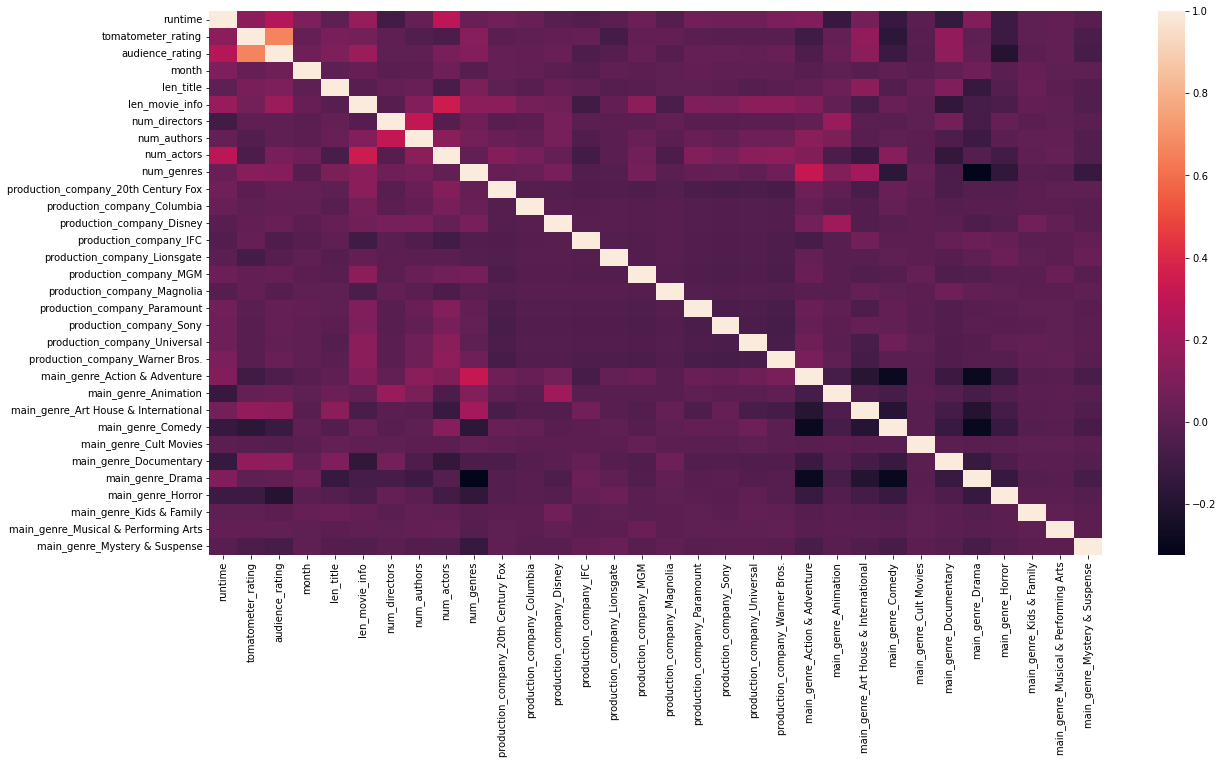

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df_sub.corr())
plt.show()

In [39]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [40]:
df_final_train = df_sub.drop("audience_rating",axis=1)

In [41]:
# get features and target
X = df_final_train.drop("tomatometer_rating", axis=1)
y = df_final_train["tomatometer_rating"]

In [42]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7499829223307602
0.2500170776692397


In [43]:
# this function takes in a model algorithm and the training data and prints graphs and metrics
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

TRAINING SET
root mean squared error (RMSE): 25.885978899618443
R-squared (R2 ): 0.1649743706283674
MAE 21.729778817182854

Testing SET
root mean squared error (RMSE): 26.041635474964046
R-squared (R2 ): 0.1620058753327729
MAE 21.981315811727885


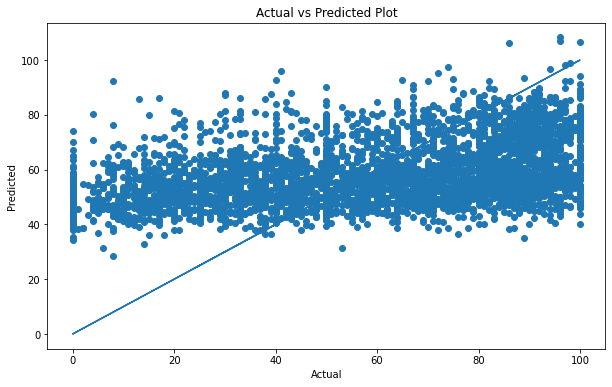

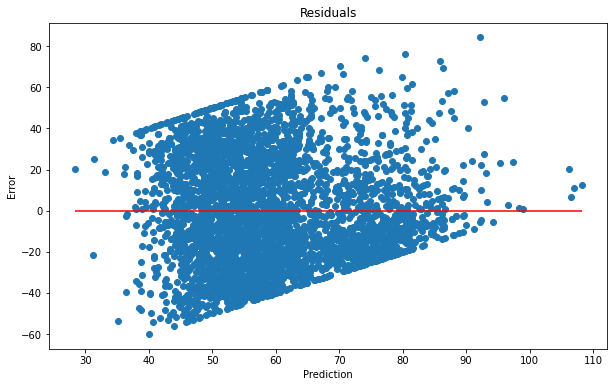

In [44]:
lr = LinearRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 9.725820273327594
R-squared (R2 ): 0.8821246217223218
MAE 7.97240459058202

Testing SET
root mean squared error (RMSE): 26.345754291352673
R-squared (R2 ): 0.14231910320593955
MAE 21.91058469945355


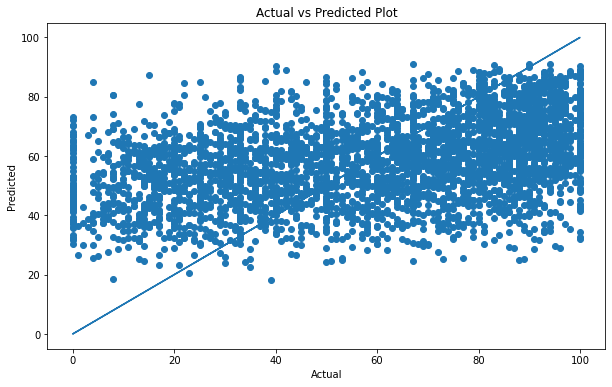

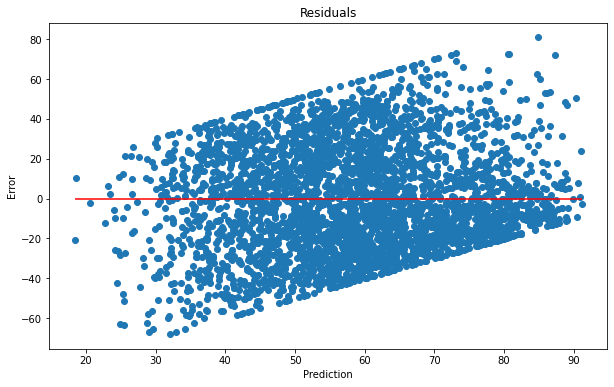

In [45]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 26.57387298011551
R-squared (R2 ): 0.12000474707298214
MAE 22.884750211270703

Testing SET
root mean squared error (RMSE): 26.983610952068776
R-squared (R2 ): 0.100285756284335
MAE 23.268285521670826


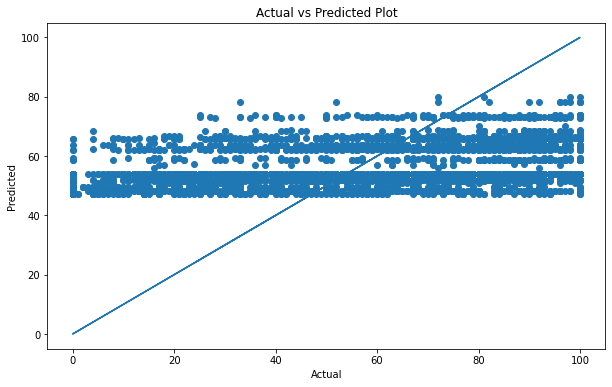

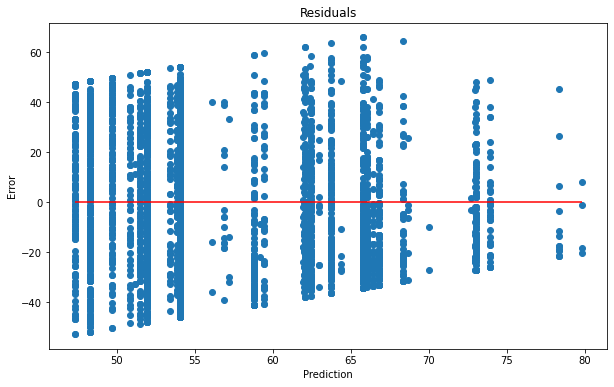

In [46]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 18.28465216898895
R-squared (R2 ): 0.5833762477223201
MAE 14.56897179980972

Testing SET
root mean squared error (RMSE): 26.73243019833732
R-squared (R2 ): 0.11695802955156853
MAE 22.12024291285563


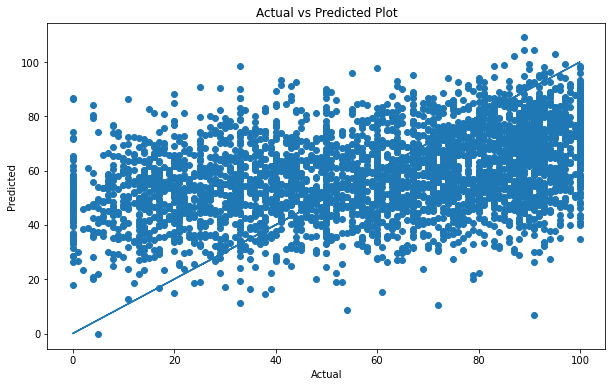

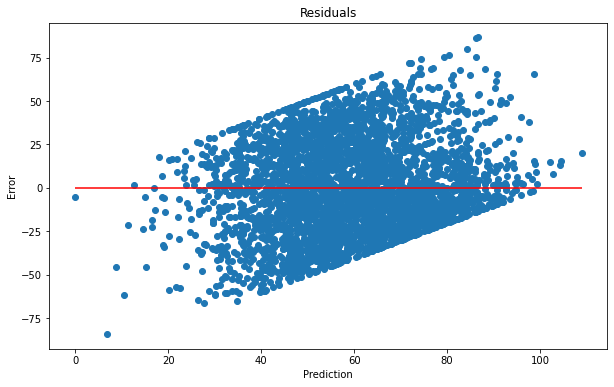

In [47]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)